In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r"C:\Users\ATOnile\Downloads\flight_dataset.csv")

In [5]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


# check data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


# check missing values

In [9]:
df.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

# data visiuilization 

# 1. Average Price by Airline

In [11]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [22]:
Average_Price_by_Airline = df.groupby('Airline')['Price'].mean().reset_index()
Average_Price_by_Airline.columns = ['Airline', 'Price']
print(Average_Price_by_Airline)

                              Airline         Price
0                            Air Asia   5590.260188
1                           Air India   9611.210616
2                               GoAir   5861.056701
3                              IndiGo   5673.682903
4                         Jet Airways  11643.923357
5                Jet Airways Business  58358.666667
6                   Multiple carriers  10902.678094
7   Multiple carriers Premium economy  11418.846154
8                            SpiceJet   4338.284841
9                              Trujet   4140.000000
10                            Vistara   7796.348643
11            Vistara Premium economy   8962.333333


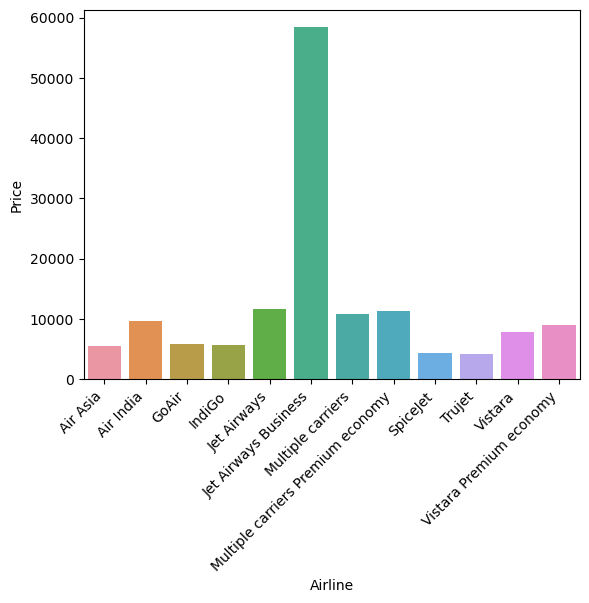

In [30]:
sns.barplot(x = 'Airline', y = 'Price', data = Average_Price_by_Airline )
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Total Flights by Source and Destination

In [32]:
df['Source'].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [34]:
df['Destination'].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [14]:
melted_df = pd.melt(df, id_vars=['Source', 'Destination'], value_vars=['Airline'], var_name='Variable', value_name='Value')
print(melted_df)

         Source Destination Variable        Value
0      Banglore   New Delhi  Airline       IndiGo
1       Kolkata    Banglore  Airline    Air India
2         Delhi      Cochin  Airline  Jet Airways
3       Kolkata    Banglore  Airline       IndiGo
4      Banglore   New Delhi  Airline       IndiGo
...         ...         ...      ...          ...
10678   Kolkata    Banglore  Airline     Air Asia
10679   Kolkata    Banglore  Airline    Air India
10680  Banglore       Delhi  Airline  Jet Airways
10681  Banglore   New Delhi  Airline      Vistara
10682     Delhi      Cochin  Airline    Air India

[10683 rows x 4 columns]


In [46]:
melted_df.head(5)

,Source,Destination,Variable,Value
0,Banglore,New Delhi,Airline,IndiGo
1,Kolkata,Banglore,Airline,Air India
2,Delhi,Cochin,Airline,Jet Airways
3,Kolkata,Banglore,Airline,IndiGo
4,Banglore,New Delhi,Airline,IndiGo


In [33]:
pivot_df = df.pivot_table(index='Source', columns='Destination', values='Airline', aggfunc='count')

# Print the pivot table
print(pivot_df)

Destination  Banglore  Cochin   Delhi  Hyderabad  Kolkata  New Delhi
Source                                                              
Banglore          NaN     NaN  1265.0        NaN      NaN      932.0
Chennai           NaN     NaN     NaN        NaN    381.0        NaN
Delhi             NaN  4537.0     NaN        NaN      NaN        NaN
Kolkata        2871.0     NaN     NaN        NaN      NaN        NaN
Mumbai            NaN     NaN     NaN      697.0      NaN        NaN


In [35]:
pivot_df.head(5)

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,1265.0,NaN,NaN,932.0
Chennai,NaN,NaN,NaN,NaN,381.0,NaN
Delhi,NaN,4537.0,NaN,NaN,NaN,NaN
Kolkata,2871.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,697.0,NaN,NaN


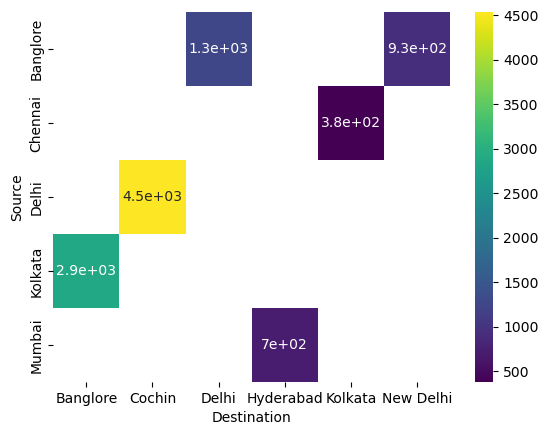

In [37]:
sns.heatmap(pivot_df, annot=True, cmap='viridis') 
plt.show()

# 3. Average Duration by Total Stops

In [39]:
df['Total_Stops'].value_counts()

Total_Stops
1    5626
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [65]:
df['Duration_hours'].value_counts()
df['Duration_hours'].head()

0     2
1     7
2    19
3     5
4     4
Name: Duration_hours, dtype: int64

In [45]:
x = df['Total_Stops'].mean()
print(x)
y = df['Duration_hours'].mean()
print(y)

0.8242066835158663
10.2465599550688


In [55]:
# create new data frame 
means_df = pd.DataFrame({'metric': ['Total_Stops','Duration_hours'], 'mean_value' : [x,y]})
print(means_df)

           metric  mean_value
0     Total_Stops    0.824207
1  Duration_hours   10.246560


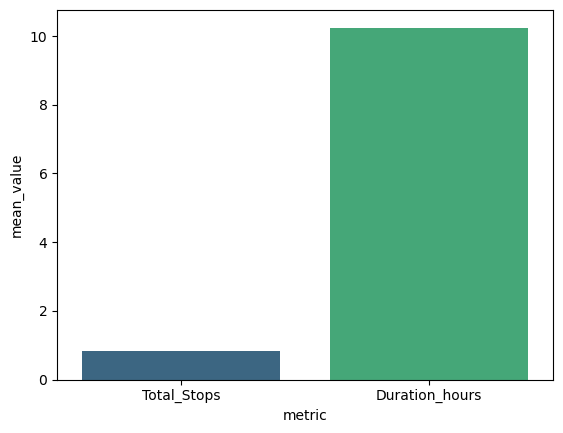

In [63]:
sns.barplot(x = 'metric', y = 'mean_value', data = means_df, palette='viridis' )
plt.show()

# 4. Distribution of Prices

In [67]:
df['Price'].value_counts()

Price
10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: count, Length: 1870, dtype: int64

In [69]:
 x = df['Price'].mean()
print(x)

9087.064120565385


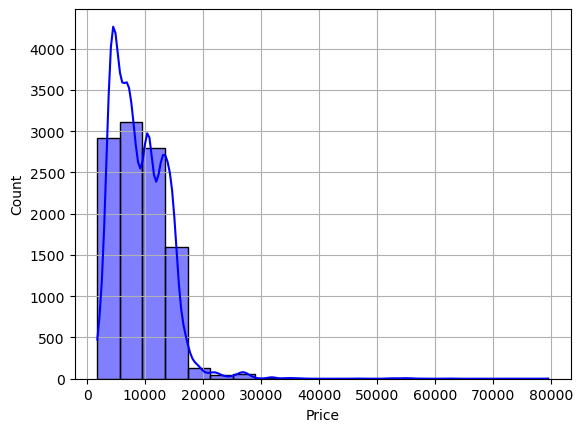

In [81]:
sns.histplot(df['Price'],bins =20, kde=True, color='blue')
plt.grid(True)
plt.show()

# 5. Monthly Trend of Flights

In [108]:
 count = df['Month'].value_counts()
 print(count)

Month
5    3466
6    3414
3    2724
4    1079
Name: count, dtype: int64


In [85]:
 x = df['Month'].mean()
 print(x)

4.708602452494618


In [99]:
 top_5_airlines = df['Airline'].head(5)
 print(top_5_airlines)

0         IndiGo
1      Air India
2    Jet Airways
3         IndiGo
4         IndiGo
Name: Airline, dtype: object


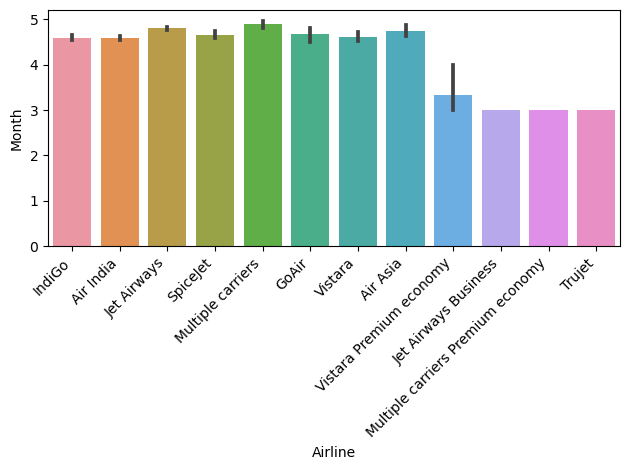

In [114]:
sns.barplot(x = 'Airline', y = 'Month', data = df)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

# 6. Peak Departure Times

In [116]:
df['Dep_hours'].value_counts()

Dep_hours
9     916
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: count, dtype: int64

In [118]:
df['Dep_hours'].mean()

12.490686136852943

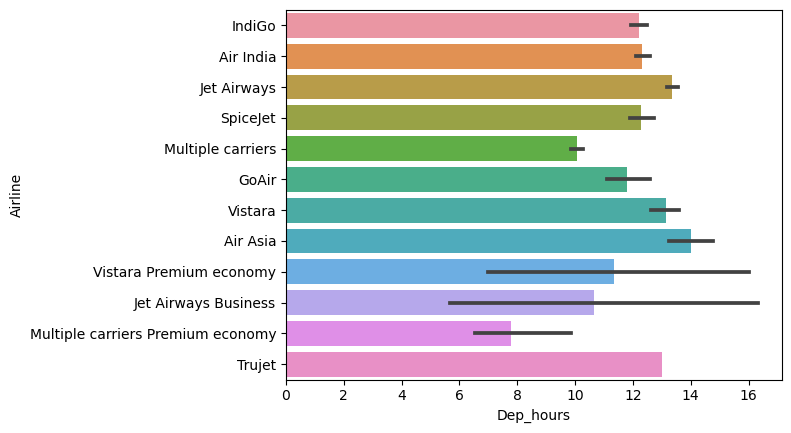

In [140]:
# Plotting scatter plot
sns.barplot(x='Dep_hours', y='Airline', data=df)
plt.show()

# 7. Peak Arrival Times

In [144]:
df['Arrival_hours'].value_counts()
df['Arrival_hours'].head(6)

0     1
1    13
2     4
3    23
4    21
5    11
Name: Arrival_hours, dtype: int64

In [146]:
df['Arrival_hours'].mean()

13.348778433024432

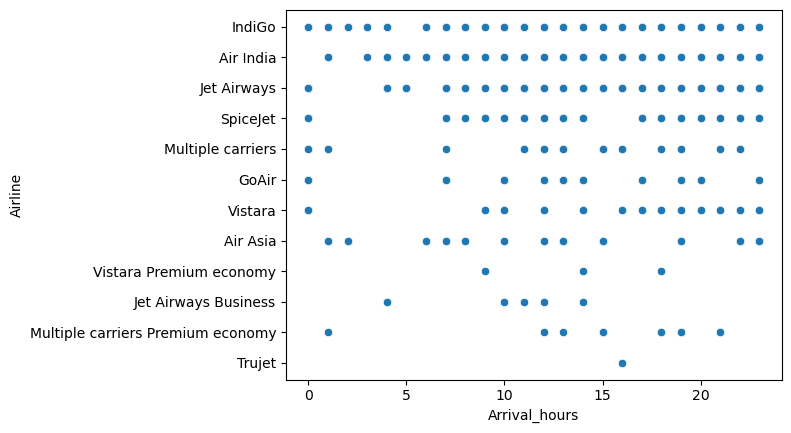

In [150]:
sns.scatterplot(x='Arrival_hours', y='Airline', data=df)
plt.show()

# 8. Average Duration by Airline

In [152]:
df['Duration_min'].value_counts()

Duration_min
30    1446
0     1032
20     997
50     972
35     939
55     910
15     903
45     896
25     803
40     637
5      623
10     525
Name: count, dtype: int64

In [154]:
Average_Duration_by_Airline = df.groupby('Airline')['Price'].mean().reset_index()
print(Average_Duration_by_Airline)

                              Airline         Price
0                            Air Asia   5590.260188
1                           Air India   9611.210616
2                               GoAir   5861.056701
3                              IndiGo   5673.682903
4                         Jet Airways  11643.923357
5                Jet Airways Business  58358.666667
6                   Multiple carriers  10902.678094
7   Multiple carriers Premium economy  11418.846154
8                            SpiceJet   4338.284841
9                              Trujet   4140.000000
10                            Vistara   7796.348643
11            Vistara Premium economy   8962.333333


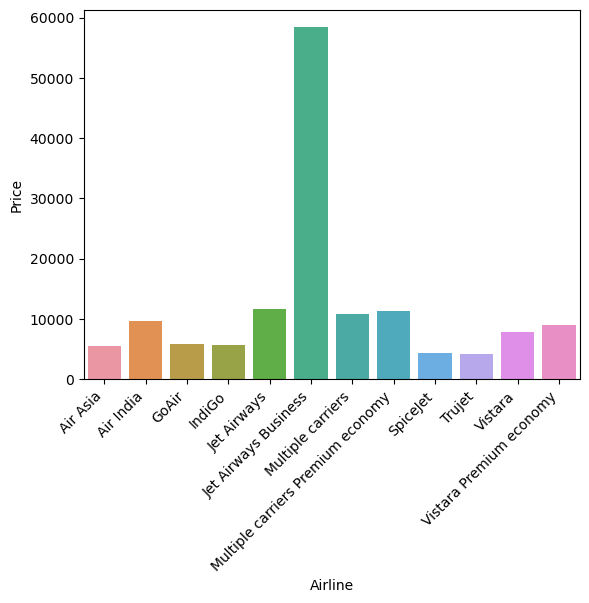

In [158]:
sns.barplot(x = 'Airline', y = 'Price', data = Average_Duration_by_Airline)
plt.xticks(rotation = 45, ha = 'right')
plt.show()